Team name: DM  
Student id:  772526  
Student name: Damir Medakovic  
Challenge id: 1   

In [1]:
import torch
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [17]:
df = pd.read_csv("TDT5_datasets/challenge1_train.csv")


In [10]:
df.head(3)

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,0,0,254e988c9,0.0,6.8928,a,0.0,0.2,0.3,3829ad8a4,...,79df04ed6,A,2.0,51.0,3.0,1.0,D,0.0,6d3db6c57,a7059911d
1,1,0,e3282379d,0.0,6.8098,n,NaN,0.0,0.1,fd943bc67,...,2815e62ea,U,0.0,10.0,1.0,3.0,E,0.0,abce980f5,e60e65034
2,2,0,c362abead,1.0,6.7761,k,0.0,0.1,0.0,b770c0db2,...,8496c8e33,Q,1.0,16.0,3.0,0.0,NaN,0.0,63dde2492,d3d8f55e0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      50000 non-null  int64  
 1   target  50000 non-null  int64  
 2   f0      48467 non-null  object 
 3   f1      48492 non-null  float64
 4   f2      48594 non-null  float64
 5   f3      48472 non-null  object 
 6   f4      48424 non-null  float64
 7   f5      48473 non-null  float64
 8   f6      48552 non-null  float64
 9   f7      48503 non-null  object 
 10  f8      48463 non-null  float64
 11  f9      48484 non-null  object 
 12  f10     48500 non-null  float64
 13  f11     48553 non-null  float64
 14  f12     48491 non-null  float64
 15  f13     48471 non-null  float64
 16  f14     48538 non-null  object 
 17  f15     48459 non-null  object 
 18  f16     48495 non-null  object 
 19  f17     48509 non-null  float64
 20  f18     48501 non-null  float64
 21  f19     48478 non-null  float64
 22

Observations so far:
- There are 50k rows in the training set
- Each row has 24 features
- Each row has some missing (NULL) values
- The dataset is a mix of datatypes (int, float, object) 

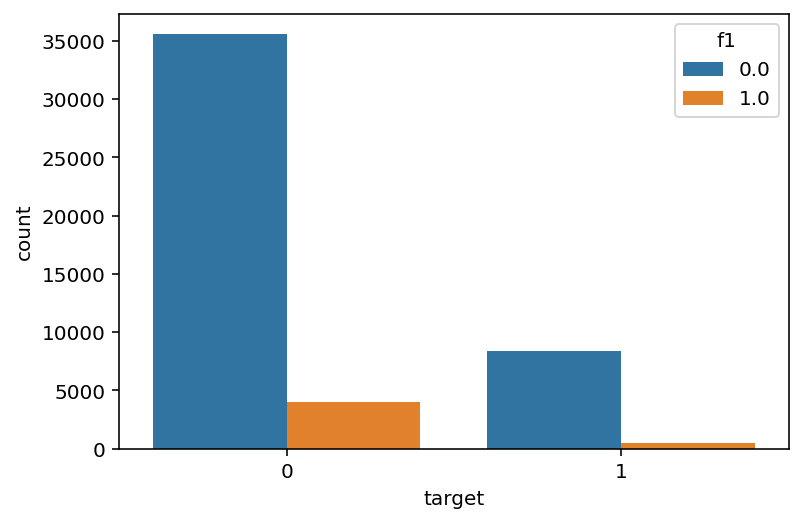

In [5]:
sns.countplot(x='target', hue='f1', data=df);

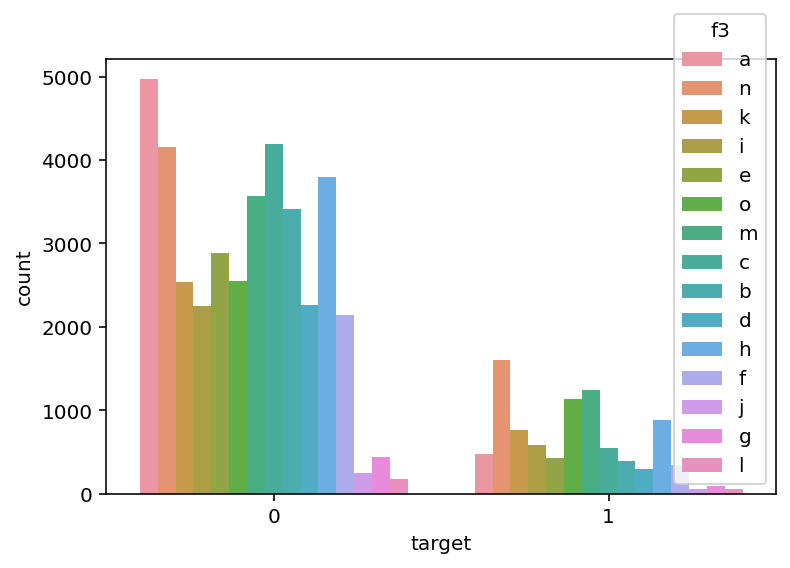

In [6]:
sns.countplot(x='target', hue='f3', data=df);

Notes:
- Interpretation of visuals more difficult when domain is unknown
- However, some clear patterns emerge when plotting most features against target value

In [12]:
pd.set_option('display.max_rows', None)  
for col in df.columns: 
    if type(df[col][1]) == str:
        print(f"Column {col} with value counts \n {df[col].value_counts()}")
        print("------------------------------------------------------")

Column f0 with value counts 
 77ec681b1    63
4b81bbdaf    59
d7b264c91    58
6e4fe1c9b    56
035be1628    55
6a114fc58    55
b04d90dad    55
2dd479fa4    55
7887aa63a    55
9bc905a9d    54
ad29bbe78    54
036613d73    54
223254308    54
6fafa6144    53
6fc06f8de    53
4d3766412    53
053cf1f9e    53
442a1dbe7    53
2af6f730a    53
32b8b011e    52
0d658a668    52
4495789ef    52
49d2f3324    52
3857ceae4    52
ad3077594    51
9f9fad851    51
599eea8f2    51
0aec937d7    51
889dc0fff    50
7d6664165    50
322412997    50
01f1f7bf0    49
f01fcc0ad    49
06b558e39    49
956a98bcb    49
71375ae45    49
5813026e2    49
f9bf6b1bb    49
0502fb18a    49
2e10e33df    49
f64fb5464    49
a13d2e508    48
e2ea87f49    48
47dc23025    48
8e3cb11fd    48
717d31bdd    48
5adeb3ab0    48
cb3a45965    48
44312d88a    48
897572960    48
f7f2767dd    48
979df9cc9    48
f37df64af    48
bb3a71e71    47
1a5144b66    47
6fbdeefc8    47
37d50602b    47
f8e5ca92b    47
7827df0a3    47
73eef2e8a    47
6389672ba 

In [18]:
df.drop("f0", 1, inplace=True)
df.drop("f7", 1, inplace=True)
df.drop("f3", 1, inplace=True)
df.drop("f9", 1, inplace=True)
df.drop("f16", 1, inplace=True)
df.drop("f14", 1, inplace=True)
df.drop("f15", 1, inplace=True)
df.drop("f21", 1, inplace=True)
df.drop("f23", 1, inplace=True)
df.drop("f24", 1, inplace=True)
df.head()

,id,target,f1,f2,f4,f5,f6,f8,f10,f11,f12,f13,f17,f18,f19,f20,f22
0,0,0,0.0,6.8928,0.0,0.2,0.3,4.0,0.0,1.0,6.0,0.1,2.0,51.0,3.0,1.0,0.0
1,1,0,0.0,6.8098,NaN,0.0,0.1,2.0,1.0,0.0,5.0,0.1,0.0,10.0,1.0,3.0,0.0
2,2,0,1.0,6.7761,0.0,0.1,0.0,3.0,1.0,1.0,3.0,0.0,1.0,16.0,3.0,0.0,0.0
3,3,0,0.0,6.9302,3.0,0.2,0.3,6.0,0.0,0.0,2.0,0.1,1.0,63.0,3.0,0.0,0.0
4,4,0,0.0,7.0238,4.0,0.1,0.4,5.0,1.0,0.0,2.0,0.0,1.0,26.0,NaN,3.0,0.0


The dataset contains a mixture of float64, int64 and object feature types.  
The object type is a mixed type of text and numbers. In this dataset the values  
are cryptic, but we regard them of categories of some sort. As shown in the cell  
above, some features consist of many categories, which could pose some problems  
when trying to encode them using a standard method called one-hot encoding.  

In [19]:
df.replace("", np.nan, regex=True, inplace=True)
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31685 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      31685 non-null  int64  
 1   target  31685 non-null  int64  
 2   f1      31685 non-null  float64
 3   f2      31685 non-null  float64
 4   f4      31685 non-null  float64
 5   f5      31685 non-null  float64
 6   f6      31685 non-null  float64
 7   f8      31685 non-null  float64
 8   f10     31685 non-null  float64
 9   f11     31685 non-null  float64
 10  f12     31685 non-null  float64
 11  f13     31685 non-null  float64
 12  f17     31685 non-null  float64
 13  f18     31685 non-null  float64
 14  f19     31685 non-null  float64
 15  f20     31685 non-null  float64
 16  f22     31685 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 4.4 MB


In [20]:
df.shape

(31685, 17)

In [21]:
df.head(30)

,id,target,f1,f2,f4,f5,f6,f8,f10,f11,f12,f13,f17,f18,f19,f20,f22
0,0,0,0.0,6.8928,0.0,0.2,0.3,4.0,0.0,1.0,6.0,0.1,2.0,51.0,3.0,1.0,0.0
2,2,0,1.0,6.7761,0.0,0.1,0.0,3.0,1.0,1.0,3.0,0.0,1.0,16.0,3.0,0.0,0.0
3,3,0,0.0,6.9302,3.0,0.2,0.3,6.0,0.0,0.0,2.0,0.1,1.0,63.0,3.0,0.0,0.0
6,6,0,0.0,7.0283,1.0,0.2,0.3,4.0,0.0,0.0,4.0,0.0,2.0,70.0,3.0,0.0,0.0
10,10,0,0.0,6.9303,3.0,0.0,0.4,5.0,1.0,0.0,5.0,0.1,0.0,5.0,2.0,4.0,0.0
13,13,1,0.0,7.1027,3.0,0.0,0.4,7.0,0.0,0.0,6.0,0.1,1.0,5.0,3.0,0.0,0.0
14,14,0,1.0,7.1511,5.0,0.2,0.5,3.0,0.0,1.0,6.0,0.0,0.0,84.0,1.0,0.0,0.0
15,15,0,0.0,7.2650,3.0,0.1,0.5,3.0,1.0,0.0,7.0,0.0,0.0,63.0,2.0,4.0,1.0
18,18,0,0.0,7.1794,4.0,0.2,0.5,5.0,0.0,0.0,3.0,0.0,0.0,65.0,2.0,2.0,1.0
19,19,1,0.0,7.0466,5.0,0.1,0.3,5.0,1.0,0.0,6.0,0.1,1.0,104.0,1.0,4.0,0.0


In [22]:
#torch_tensor_f1 = torch.tensor(df['f1'].values)
#torch_tensor_f2 = torch.from_numpy(df['f2'].values)
#print(torch_tensor_f1)


In [27]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[5106   55]
 [1139   37]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      5161
           1       0.40      0.03      0.06      1176

    accuracy                           0.81      6337
   macro avg       0.61      0.51      0.48      6337
weighted avg       0.74      0.81      0.74      6337

0.8115827678712324
